### Initial Imports 

In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import os
import time
from sklearn import preprocessing
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from os.path import exists
  


Populating the interactive namespace from numpy and matplotlib


In [16]:
from PIL import Image

ModuleNotFoundError: No module named 'PIL'

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
# http://pytorch.org/
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'



C:\Users\Public\Anaconda3\lib\site-packages\wheel\pep425tags.py:75: RuntimeWarning: Config variable 'Py_DEBUG' is unset, Python ABI tag may be incorrect
  warn=(impl == 'cp')):
C:\Users\Public\Anaconda3\lib\site-packages\wheel\pep425tags.py:79: RuntimeWarning: Config variable 'WITH_PYMALLOC' is unset, Python ABI tag may be incorrect
  warn=(impl == 'cp')):
torch-0.4.1-cp37-cp37m-linux_x86_64.whl is not a supported wheel on this platform.
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pickle
from torch.utils.data.sampler import (SubsetRandomSampler,
                                      RandomSampler)
from torchvision import datasets, transforms

ModuleNotFoundError: No module named 'PIL'

In [ ]:
# If a GPU is available, use it
# Pytorch uses an elegant way to keep the code device agnostic
if torch.cuda.is_available():
    device = torch.device("cuda")
    use_cuda = True
else:
    device = torch.device("cpu")
    use_cuda = False
    
print(device)

### Import data and re-organized for PyTorch data loader

In [0]:
path_to_data = 'drive/My Drive/DL-assignment1'

full_images = np.genfromtxt(path_to_data)
np.random.shuffle(full_images)

IsADirectoryError: ignored

In [0]:
full_inputs = full_images[:,:-1]
full_labels = full_images[:, -1]

In [0]:
directory = os.path.dirname('./data_ds/')

try:
    os.stat(directory)
except:
    os.mkdir(directory)  

In [0]:
# Delete all data in folder 
import os, shutil
folder = './data_ds/'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)

!ls "./data_ds/"

In [0]:
##############################################################################3
###################### NPY FILES ####################

## Empty directory
full_dataset = np.asarray(full_inputs).astype(np.float32)
z=0

# load data for dataloader
start = time.time()
for x in range(full_dataset.shape[0]):
    for y in range(2):
        if full_labels[x] == y: 
            temp = (full_dataset[x,:].reshape(1,28,28))
            
            directory = './data_ds/' + str(y)
            if not os.path.exists(directory):
                os.makedirs(directory)
            
            
            np.save((directory+ '/' +str(z) +'.npy'), temp)
            
            z += 1
    
end = time.time()

print('Time to process: ', end-start)
print(z, ' datapoints saved to path')

### From .jpg to .npy

In [0]:

!pip install Pillow==4.0.0
!pip install PIL
!pip install image
import PIL.Image

In [0]:


directory = os.path.dirname('drive/My Drive/DL-assignment1/tensor_data/Dog/')

try:
    os.stat(directory)
    print('it exists')
except:
    os.mkdir(directory)  

In [0]:
cat_path = 'drive/My Drive/DL-assignment1/trainset/Cat/'

start = time.time()
count=0

for y in range(9999):

  filename = cat_path+ str(y+1) +'.Cat'
  img = Image.open( filename + '.jpg' )
  data = np.array( img, dtype='uint8' )
  if len(data.shape )== 3:
    data = np.reshape(data, (3,64,64))
    np.save( 'drive/My Drive/DL-assignment1/tensor_data/Cat/'+str(y+1) , torch.as_tensor(data, dtype=torch.float))
    count= count+1
    if(count%1000) == 0:
      print(count, ' transformed. Time since start: ', time.time()-start)
end = time.time()

print('Time to transform cat files from jpg to npy: ', end-start)
print(count, ' files transformed')

In [0]:
z = Image.open('drive/My Drive/DL-assignment1/trainset/Cat/1000.Cat.jpg')
data = np.array(z, dtype='uint8')
print(len(data.shape))

print(data.shape)
#print(np.all(data,axis=3))
#if(data[])

3
(64, 64, 3)


In [0]:
dog_path = 'drive/My Drive/DL-assignment1/trainset/Dog/'

start = time.time()
count=0

for y in range(9999):

  filename = dog_path+ str(1+y) +'.Dog'
  img = Image.open( filename + '.jpg' )
  data = np.array( img, dtype='uint8' )
  if len(data.shape) == 3:
    data = np.reshape(data, (3,64,64))
    np.save( 'drive/My Drive/DL-assignment1/tensor_data/Dog/'+str(y+1) , torch.as_tensor(data, dtype=torch.float))
    count= count+1
    if(count%1000) == 0:
      print(count, ' transformed. Time since start: ', time.time()-start)

end = time.time()

print('Time to transform Dog files from jpg to npy: ', end-start)
print(count, ' files transformed')

1000  transformed. Time since start:  624.7372686862946
2000  transformed. Time since start:  1227.4554409980774
3000  transformed. Time since start:  1810.4254846572876
4000  transformed. Time since start:  2404.1375551223755
5000  transformed. Time since start:  2985.825596809387
6000  transformed. Time since start:  3590.326904773712
7000  transformed. Time since start:  4189.921615123749
8000  transformed. Time since start:  4778.774834871292
9000  transformed. Time since start:  5355.403125286102
Time to transform Dog files from jpg to npy:  5940.622883319855
9986  files transformed


<hr>
9989 Cats files<br>
9986 Dog files

In [0]:
x = np.load('drive/My Drive/DL-assignment1/tensor_data/Cat/1111.npy')

print(x.shape)

#plt.imshow(x)

#y = np.reshape(x, (3,64,64))

#y.shape

(3, 64, 64)


#### Other stuff

In [0]:
directory = os.path.dirname('./data/')


os.mkdir(directory)
os.mkdir(os.path.dirname('./data/Cat/'))
os.mkdir(os.path.dirname('./data/Dog/'))

In [0]:

path_to_data_cat = 'drive/My Drive/DL-assignment1/npy_data/Cat/'

path_to_data_dog = 'drive/My Drive/DL-assignment1/npy_data/Dog/'
startTime = time.time()
for i in range(9998):
  
  data = np.load(path_to_data_cat + str(i+1) + '.npy')
  data2 = np.load(path_to_data_dog+ str(i+1) + '.npy')
  
  np.save('./data/Cat/', data)
  np.save('./data/Dog/', data2)
  if i % 1000 == 0:
    print(i, ' data transfered.')
print('data transferred in ' ,time.time()-startTime, ' seconds.')

In [0]:
# Delete all data in folder 
import os, shutil
folder = './data/'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)

!ls "./data_ds/"

0  1


In [0]:
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.jpg'):
  fileList = []
  print(myDir)
  for root, dirs, files in os.walk(myDir, topdown=False):
      for name in files:
          if name.endswith(format):
              fullName = os.path.join(root, name)
              fileList.append(fullName)
return fileList

In [0]:
myFileList = createFileList('drive/My Drive/DL-assignment1/trainset/Cat')

for file in fileList:
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("data.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

#### npy saved as 64,64,3  This changes it to 3, 64, 64

In [0]:

for y in range(9999):
  x = np.load('drive/My Drive/DL-assignment1/npy_data/Dog/'+str(y+1)+'.npy')
  z = np.reshape(x, (3,64,64))
  np.save( 'drive/My Drive/DL-assignment1/npy_data/Dog/'+str(y+1) , z)




ValueError: ignored

### Data Loading and Model definition

In [15]:

!pip install Pillow==4.0.0
!pip install PIL
!pip install image
import PIL.Image

  Using cached https://files.pythonhosted.org/packages/8d/80/eca7a2d1a3c2dafb960f32f844d570de988e609f5fd17de92e1cf6a01b0a/Pillow-4.0.0.tar.gz
  Complete output from command C:\Users\Public\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\pip-install-44ux_jp6\\Pillow\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-wheel-c8kmp6ie --python-tag cp37:
  Single threaded build for windows
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\PIL
  copying PIL\BdfFontFile.py -> build\lib.win-amd64-3.7\PIL
  copying PIL\BmpImagePlugin.py -> build\lib.win-amd64-3.7\PIL
  copying PIL\BufrStubImagePlugin.py -> build\lib.win-amd64-3.7\PIL
  copying PIL\ContainerIO.py -> build\lib.

    File "C:\Users\Public\Anaconda3\lib\site-packages\setuptools\__init__.py", line 140, in setup
      return distutils.core.setup(**attrs)
    File "C:\Users\Public\Anaconda3\lib\distutils\core.py", line 148, in setup
      dist.run_commands()
    File "C:\Users\Public\Anaconda3\lib\distutils\dist.py", line 966, in run_commands
      self.run_command(cmd)
    File "C:\Users\Public\Anaconda3\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "C:\Users\Public\Anaconda3\lib\site-packages\wheel\bdist_wheel.py", line 202, in run
      self.run_command('build')
    File "C:\Users\Public\Anaconda3\lib\distutils\cmd.py", line 313, in run_command
      self.distribution.run_command(command)
    File "C:\Users\Public\Anaconda3\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "C:\Users\Public\Anaconda3\lib\distutils\command\build.py", line 135, in run
      self.run_command(cmd_name)
    File "C:\Users\Public\Anaconda3\lib\distutils\cmd.py

    copying PIL\WalImageFile.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\WebPImagePlugin.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\WmfImagePlugin.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\XbmImagePlugin.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\XpmImagePlugin.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\XVThumbImagePlugin.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\_binary.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\_tkinter_finder.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\_util.py -> build\lib.win-amd64-3.7\PIL
    copying PIL\__init__.py -> build\lib.win-amd64-3.7\PIL
    running egg_info
    writing Pillow.egg-info\PKG-INFO
    writing dependency_links to Pillow.egg-info\dependency_links.txt
    writing requirements to Pillow.egg-info\requires.txt
    writing top-level names to Pillow.egg-info\top_level.txt
    reading manifest file 'Pillow.egg-info\SOURCES.txt'
    reading manifest template 'MANIFEST.in'
    no previously-inclu

  Failed building wheel for Pillow
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
scikit-image 0.14.0 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
Command "C:\Users\Public\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\pip-install-44ux_jp6\\Pillow\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-record-y4fuit31\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-install-44ux_jp6\Pillow\


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


ModuleNotFoundError: No module named 'PIL'

In [ ]:
transform = transforms.Compose([
    
    transforms.ToTensor()
])


class prep_stuff:
    def __init__(self, batch_size, path, n_valid, n_test):
        self.batch_size = batch_size
        self.path = path
        self.n_test = n_test

        batch_size_eval = 128
        
          
        #self.train_data = datasets.ImageFolder(self.path, transform=transform )

        self.train_data = datasets.DatasetFolder(self.path, np.load, '.npy' )
        
        #self.train_data = datasets.DatasetFolder(self.path, Image.open, ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif'], transform=transform )

        
        indices = list(range(len(self.train_data)))
        random.shuffle(indices)

        # Split dataset into train and Test sets
        self.train_loader = DataLoader(
            self.train_data,
            batch_size=self.batch_size,
            sampler=SubsetRandomSampler(indices[:n_valid]),
            num_workers=3,
            pin_memory=use_cuda
        )

        # Split dataset into train and Test sets
        self.valid_loader = DataLoader(
            self.train_data,
            batch_size=self.batch_size,
            sampler=SubsetRandomSampler(indices[n_valid:(n_valid+n_test)]),
            num_workers=3,
            pin_memory=use_cuda
        )
        self.test_loader = DataLoader(
            self.train_data,
            batch_size=batch_size_eval,
            sampler=SubsetRandomSampler(indices[(n_valid+n_test):]),
            num_workers=3,
            pin_memory=use_cuda
        )
        
           


# Create the object with both loader and loss functions
sstart = time.time()

batchSize = 16

path = './trainset/'
valid = 15000 
test = 3000

end = time.time()

pre_model = prep_stuff(batchSize, path, valid, test)


print('time to upload: ', end-sstart)

In [0]:
#Random check for tensor sizes
rand = np.random.randint(1,9999)
x = np.load('drive/My Drive/DL-assignment1/tensor_data/Cat/'+ str(rand) +'.npy')
if(np.size(data,axis=0) == 3):

  print(x.shape)

(3, 64, 64)


This is the shape of one batch torch.Size([64, 3, 64, 64]). What is the meaning of each dimension?  batch size * channels * height * width
target torch.Size([64])
Time to compute:  38.842076778411865


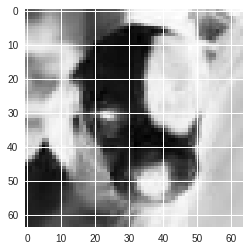

In [0]:

aaa=time.time()
for inputs, targets in pre_model.train_loader:
    print(f"This is the shape of one batch {inputs.shape}. What is the meaning of each dimension?  batch size * channels * height * width")
    print("target", targets.shape)
    img = inputs[0,0]
    
    plt.imshow(img)
    break
    
bbb = time.time()

print('Time to compute: ' , bbb-aaa)

In [0]:
class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        # conv block 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        
        # conv block 2
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        
        # conv block 3
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
       
        
        # fully connected layers
        self.fc1 = nn.Linear(32*32*32, 512)
        self.fc2 = nn.Linear(512, 2)
        
       


    def forward(self, x):
        # x is [batch_size, channels, heigth, width] = [bs, 1, 64, 64]
        x = F.relu((self.conv1(x)))
        x = F.relu((self.conv2(x)))
        x = F.max_pool2d(x, 2) # x is [bs, 32, 32, 32]
        
        #x = F.relu((self.conv3(x)))
        #x = F.relu((self.conv4(x)))
        #x = F.max_pool2d(x, 2) # x is [bs, 64, 16, 16]
        
        #x = F.relu((self.conv5(x)))
        #x = F.relu((self.conv6(x)))
        #x = F.max_pool2d(x, 2) # x is [bs, 64, 8, 8]
        
        
        x = x.view(x.size(0), -1) # flatten
        
        x = F.relu((self.fc1(x)))
        #x = self.fc2(x)
        
        return x
   
      #F.avg_pool2d
      
      

### Training and validation loops

In [0]:
def train(model,train_loader, optimizer, epoch ):
    """Perform one epoch of training."""
    model.train()
    
    for batch_idx, (inputs, target) in enumerate(train_loader):
      
        inputs, target = inputs.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, target)
        # Backprop
        loss.backward()
        optimizer.step()
        ###
        
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader) *len(inputs) ,
                100. * batch_idx / len(train_loader), loss.item()))

In [0]:
def test(model, test_loader):
    model.eval()
    
    test_loss = 0
    correct = 0
    test_size = 0
    with torch.no_grad():
        for inputs, target in test_loader:
          
            inputs, target = inputs.to(device), target.to(device)
            
            
            output = model(inputs)
            test_size += len(inputs)
            test_loss += test_loss_fn(output, target).item() 
            pred = output.max(1, keepdim=True)[1] 
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= test_size
    accuracy = correct / test_size
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, test_size,
        100. * accuracy))
    
    return test_loss, accuracy

In [0]:
######################################
# See if model exists, if so, load is with all params
directory = os.path.dirname('drive/My Drive/ds_hw2/trained_model')

try:
    os.stat(directory)
    PATH = 'drive/My Drive/ds_hw2/trained_model/model.py'
    model = torch.load(PATH)
    model.eval()
except:
    os.mkdir(directory) 
    


In [0]:

model = CNN().to(device)
test_accuracy = []
train_loss = []
nbr_epochs = 3

lr = 0.0005 # 



# Surrogate loss used for training
loss_fn = nn.CrossEntropyLoss()
test_loss_fn = nn.CrossEntropyLoss(reduction='sum')


optimizer = optim.SGD(model.parameters(), lr=lr)


print('Training beginning...')
start_time = time.time()
for epoch in range(1, nbr_epochs+1):
    print('Epoch ', epoch, ':')
    train(model, pre_model.train_loader, optimizer, epoch)
    loss, acc = test(model, pre_model.valid_loader)
    
    # save results every epoch
    test_accuracy.append(acc)
    train_loss.append(loss)

end_time = time.time()
print('Training on ' + str(nbr_epochs) + ' epochs done in ', str(end_time-start_time),' seconds')


Training beginning...
Epoch  1 :
Train Epoch: 1 [0/15040 (0%)]	Loss: 6.238870


KeyboardInterrupt: ignored

Process Process-24:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/dist-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.6/dist-packages/torchvision/datasets/folder.py", line 147, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.6/dist-packages/torchvision/datasets/folder.py", line 129, in pil_loader
    img = Image.open(f

In [0]:
# Accuracy
xvalues= np.arange(0,nbr_epochs,1)
plt.plot(xvalues, test_accuracy)

print('With lr=',lr,', weight decay = ',weight_decay, ', Batch size of ', batchSize ,' and ')

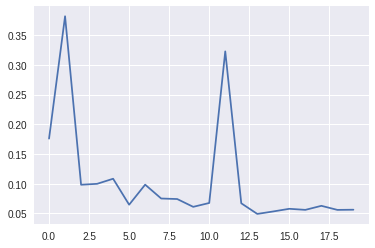

In [0]:
#error
plt.plot(xvalues, train_loss)

### Predict Unseen data

In [0]:
loss, acc = test(model, pre_model.test_loader)
print('Loss on test set: ' , loss)
print('Accuracy on Test set: ' , acc)


Validation set: Average loss: 0.0879, Accuracy: 2960/3000 (99%)

Loss on test set:  0.08794047657648722
Accuracy on Test set:  0.9866666666666667


In [0]:
###########################################
# Save model
directory = os.path.dirname('drive/My Drive/ds_hw2/trained_model/')
PATH = 'drive/My Drive/ds_hw2/trained_model/model.py'
try:
    os.stat(directory)
except:
    os.mkdir(directory) 
torch.save(model, PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### Predict labels on new Data

In [0]:
# Images to be tested
path = 'drive/My Drive/DL-assignment1/test/'

data_to_eval = np.genfromtxt(path)

images_to_pred = data_to_eval.reshape(4999, 3, 64, 64)

images_to_pred = torch.from_numpy(images_to_pred)
print(images_to_pred.shape)

torch.Size([8000, 1, 28, 28])


In [0]:
predictions = []
model.eval()
time_1 = time.time()
for x in range(images_to_pred.shape[0]):
    y = images_to_pred[x,:]
    #print(y.shape)
    y = y.float().to(device)
    f = torch.unsqueeze(y, 0)  # To add fake batch size: Unsqueeze adds '1' at index unsqueeze(index)
    #print(f.shape)
    #z = f.repeat([1, 3, 1, 1])  # To add two more channels (iff model trained on 3)
    #print('now', z.shape)
    
    pred = model(f)
    
    # will save the class as named when trained
    z = pred.max(1, keepdim=True)[1] 
    predictions.append(z)
    
time_2 = time.time()
print('Time to predict ', images_to_pred.shape[0],' examples: ', (time_2-time_1))

Time to predict  8000  examples:  16.196799516677856


### Routine to export predictions to CSV file

In [0]:
### Save result to CSV file

#* https://stackabuse.com/reading-and-writing-csv-files-in-python/
#* csv.writer(csvfile, dialect='excel', **fmtparams)

import csv

directory2 = os.path.dirname('./drive/My Drive/ds_hw2/preds/')

try:
    os.stat(directory2)
except:
    os.mkdir(directory2)  


In [0]:


myFile = open('./drive/My Drive/DL-assignment1/preds/preds_1.csv', 'w') 

with myFile:  
    myFields = ['id', 'label']
    writer = csv.DictWriter(myFile, fieldnames=myFields)    
    writer.writeheader()
    
    for x in range(len(predictions)):
      value = predictions[x].item()
      writer.writerow({'id':x+1, 'label': value})
      